In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pwd


'C:\\Users\\SUMAIRA\\Documents\\TAE_IT\\2025-26\\Sem1\\Machine Learning\\LP1_Lab\\ML\\Practical_03'

In [5]:
df=pd.read_csv("Admission_Predict.csv")

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.shape

(400, 9)

In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
df=df.drop('Serial No.',axis=1)

In [24]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [21]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [23]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']

In [25]:
#Cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25) #random state=0 means same output

In [27]:
x_train.shape  #Total=400

(300, 7)

In [34]:
x_test.shape

(100, 7)

In [29]:
#It shows random entries.
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
300,309,106,2,2.5,2.5,8.00,0
277,320,101,2,2.5,3.0,8.62,0
289,313,109,3,4.0,3.5,9.00,0
260,327,108,5,5.0,3.5,9.13,1


In [31]:
# Model creating 
#import Class  
from sklearn.tree import DecisionTreeClassifier

In [33]:
#create classifier name object 
classifier=DecisionTreeClassifier(random_state=1)  #random state=0 means same output
#For Model train ,we use fit() method.
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
#For Accuracy finding 
y_pred=classifier.predict(x_test)

In [39]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred })

In [41]:
result

,actual,predicted
398,0,1
125,0,0
328,1,1
339,1,0
172,1,1
...,...,...
300,0,0
277,0,0
289,1,0
260,1,1


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

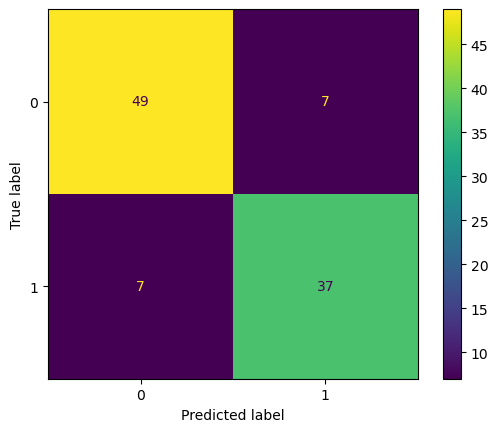

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.84      0.84      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [43]:
from sklearn.tree import plot_tree

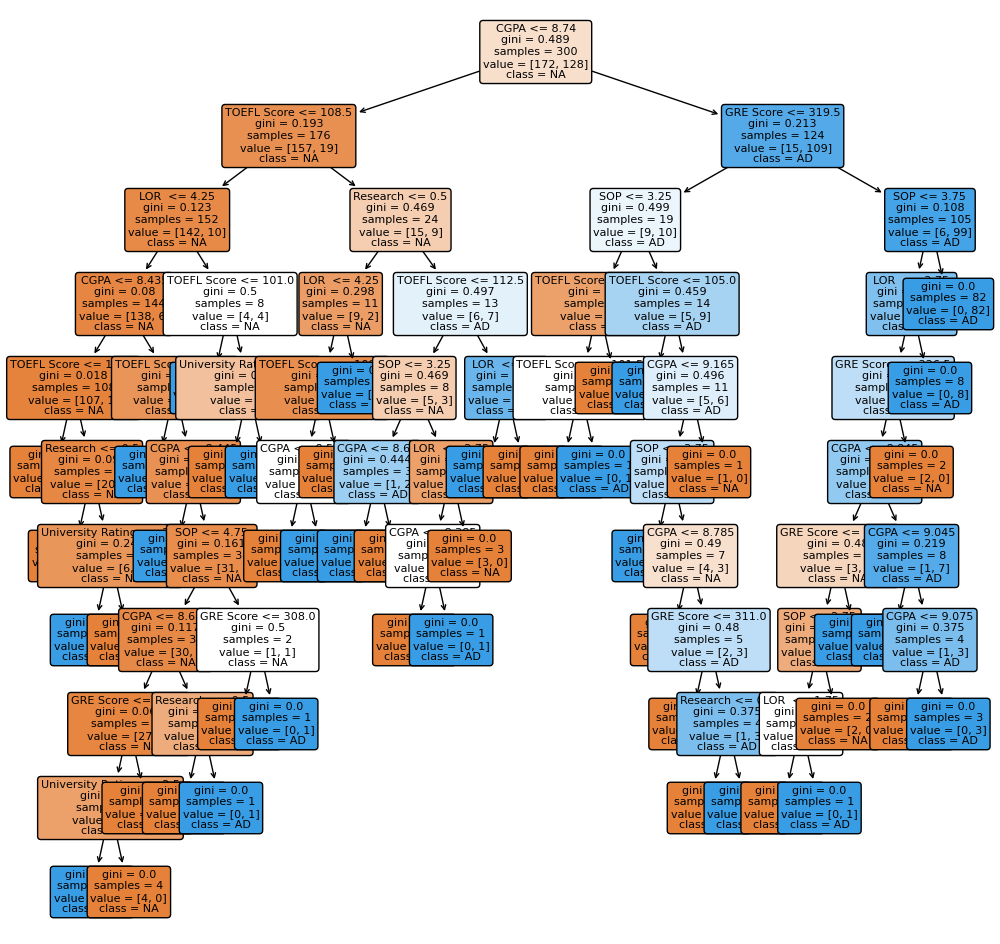

In [49]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD']);